In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from exemplars import Exemplars
from hopfield_network import HopfieldNetwork

random.seed(1234321)

**Setup** 

Let's train the Hopfield Network implementation using a series of exemplars derived from the _Lippman_ paper - the digits 0 through 8. Here are the exemplars we'll be feeding the network:

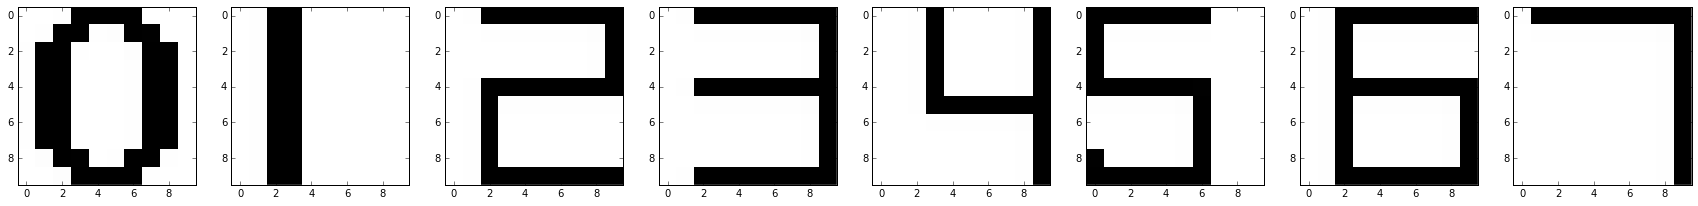

In [2]:
exemplars = Exemplars.get_exemplars()[0:8]

figure, axes = plt.subplots(1, len(exemplars), figsize=(30,30))
for i in range(0, len(exemplars)):
    axes[i].imshow(Exemplars.to_matrix(exemplars[i]), cmap='Greys', interpolation='None')

Lets now initialize the network using these exemplars, completing a few checks to confirm the structure of the weights matrix is consistent with our expectations:
- Is the matrix the correct size?  It should be 100 x 100 as each exemplar is 10x10, flattened to a 100 element vector.
- Is the diagonal 0?  That is, does $w_{ij} = 0$ when $i = j$?
- Is it symmetric?  That is, does $w_{ij} = w_{ji}$ when $i \neq j$?

In [7]:
network = HopfieldNetwork(exemplars, hebbian_test=True)

assert(len(network.weight_matrix) == 100)
assert(len(network.weight_matrix[0]) == 100)

# Check that the diagonal is 0
for i in range(0, 100):
    assert(network.weight_matrix[i][i] == 0)
    
# Symmetric
assert(np.allclose(network.weight_matrix, network.weight_matrix.T) == True)
print network.weight_matrix

8
[[ 0.    0.75 -0.25 ...,  0.    0.   -0.5 ]
 [ 0.75  0.    0.   ..., -0.25 -0.25 -0.25]
 [-0.25  0.    0.   ...,  0.25  0.25  0.25]
 ..., 
 [ 0.   -0.25  0.25 ...,  0.    1.    0.5 ]
 [ 0.   -0.25  0.25 ...,  1.    0.    0.5 ]
 [-0.5  -0.25  0.25 ...,  0.5   0.5   0.  ]]


We've confirmed our weight matrix is 100x100, has only 0 values on the diagonal, and is symmetric.

----

**Experiments:  Noisy exemplar retrieval via synchronous updating**

Our initial introduction to Hopfield Networks showed that the recall of a noisy exemplar $p^{\prime}$ was possibly by applying the formula $x_{k+1} = F_{h}(\textbf{W}x_{k})$ iteratively through $k=[0, n]$, where:
- $x_k = p^{\prime}$ when $k = 0$
- $n$ is chosen somewhat arbitrarily, but generally large enough to ensure $x_{k=n}$ represents the exemplar $p$ we aim to retrieve _OR_ the network is stuck in a cycle, thus incapable of retrieving the exemplar at all.
- $F_{h}$ is the hard limiting function, defined as 
- $\textbf{W}$ is the weights matrix of the Hopfield Network

The _synchronous_ nature of the update is the recognition that all neurons represented by the weights matrix as activated simultaneously via the matrix multiplication operation $\textbf{W}x_k$, producing a single, new output vector. 

To demonstrate the ability of the Hopfield Network to recall the original exemplars used to train it,  we'll try an experiment using noisy versions of each exemplar $0$ through $7$.  The noisy varients will be generated by randomly reversing each element in the original exemplar vector with a probability of .1 - a variation on Lippman's _Introduction to Neural Networks_.


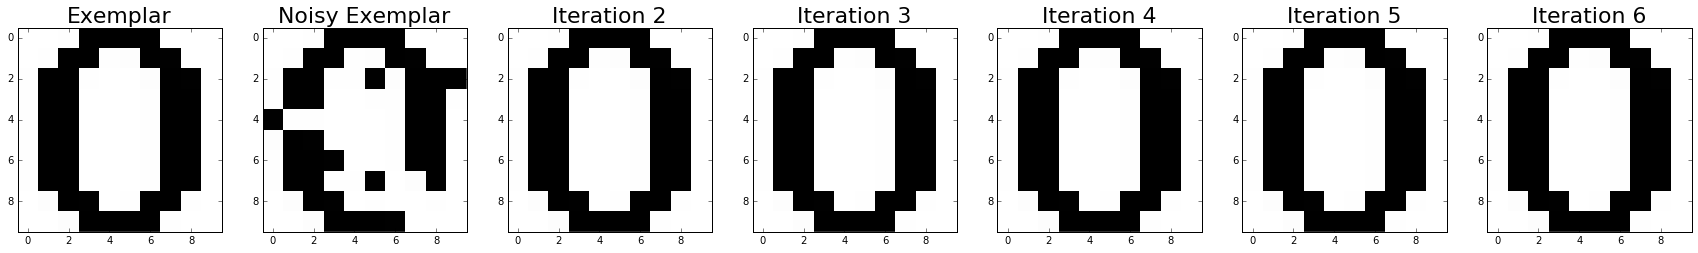

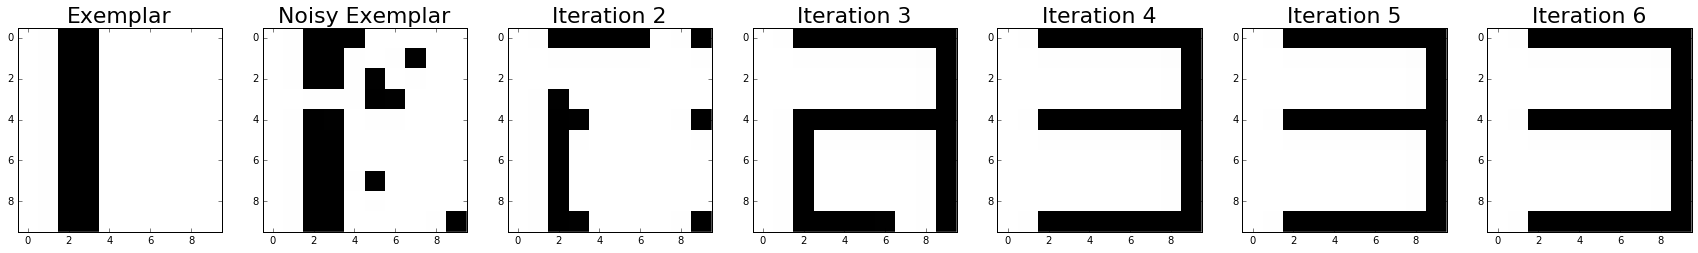

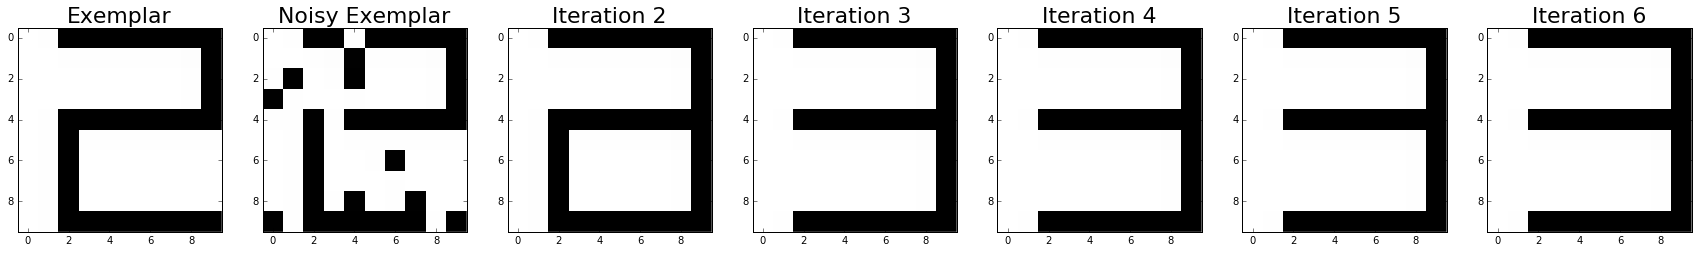

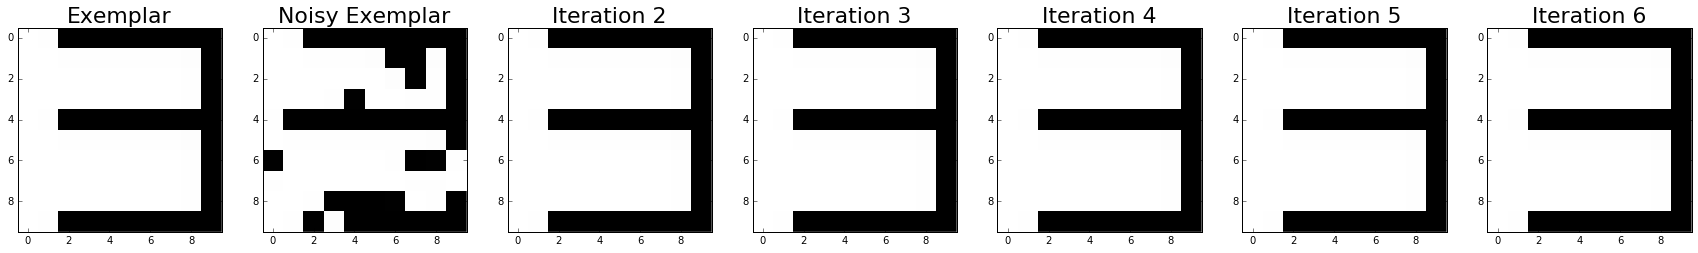

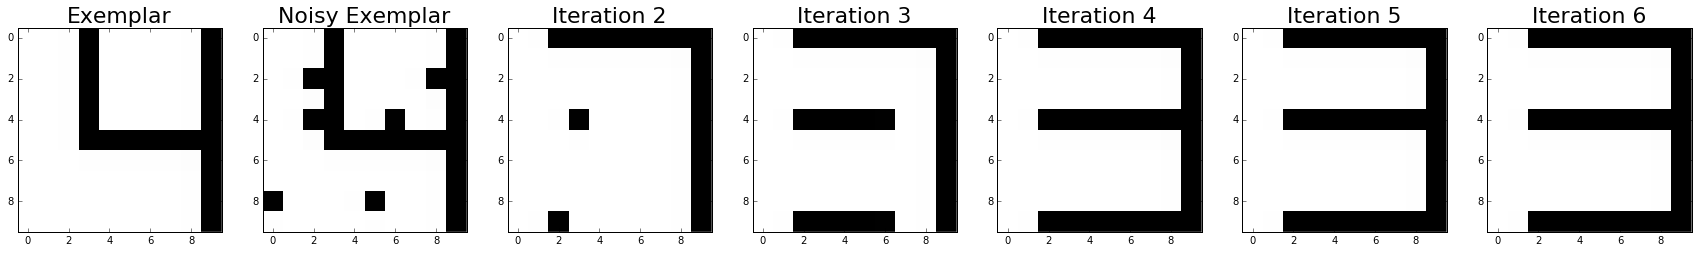

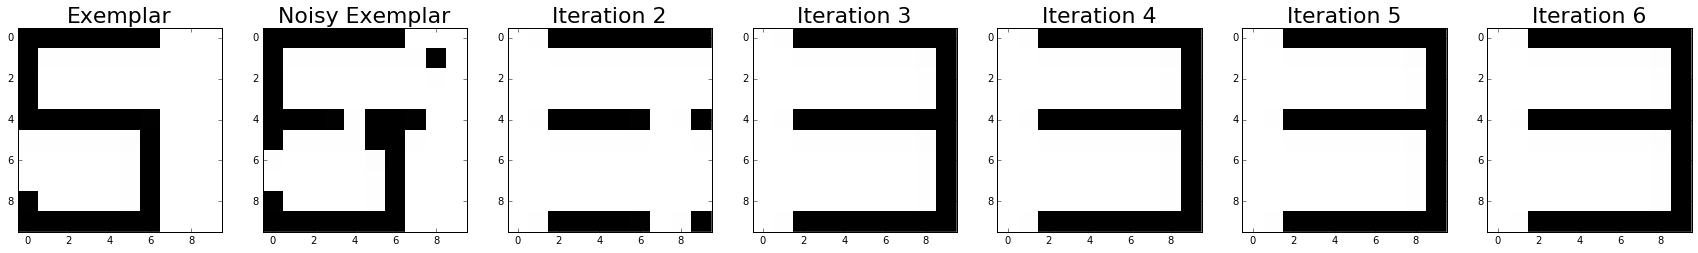

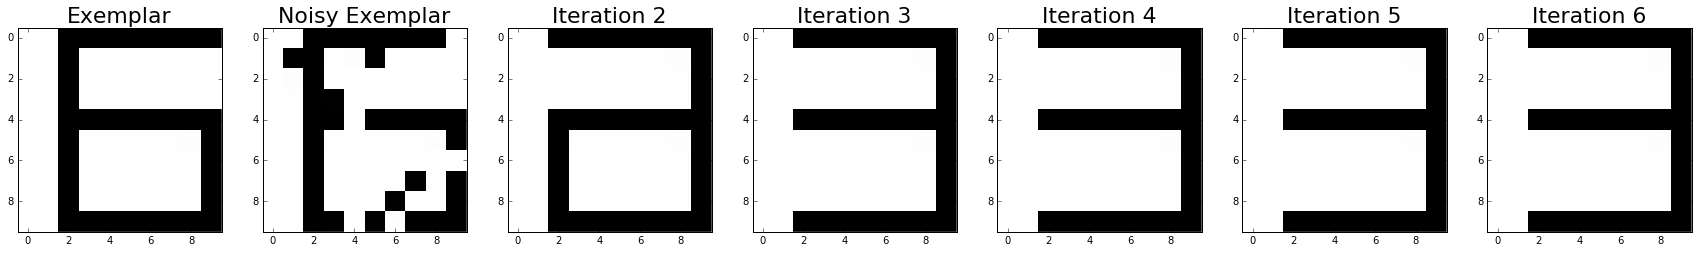

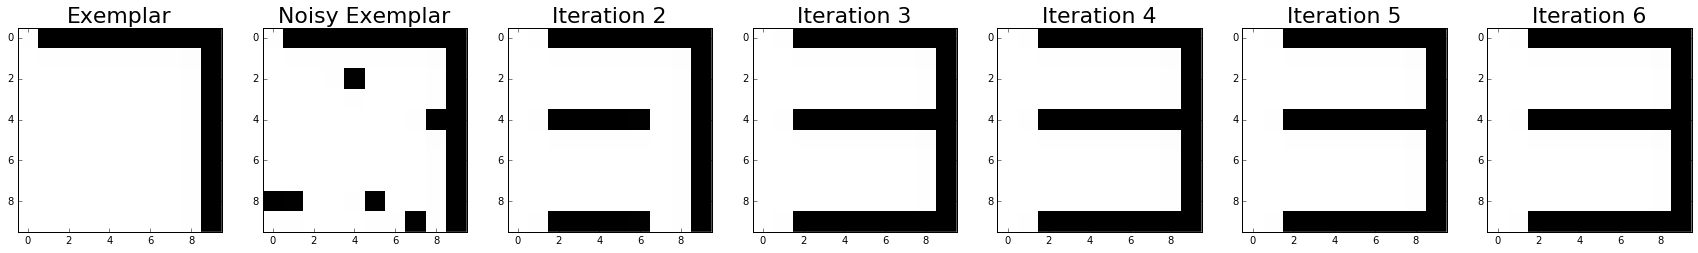

In [10]:
exemplars = Exemplars.get_exemplars()[0:8]

n = 7
for exemplar in exemplars:
    figure, axes = plt.subplots(1, n, figsize=(30,30))
    
    # Original version
    axes[0].imshow(Exemplars.to_matrix(exemplar), cmap='Greys', interpolation='None')
    axes[0].set_title("Exemplar", fontdict={'fontsize':22})

    # Noisy version
    x_k = Exemplars.add_noise(exemplar, p=.1)
    axes[1].imshow(Exemplars.to_matrix(x_k), cmap='Greys', interpolation='None')
    axes[1].set_title("Noisy Exemplar", fontdict={'fontsize':22})
    
    # Retrieval
    for i in range(2, n):
        x_k = network.recall(x_k, asynchronous=False)
        axes[i].imshow(Exemplars.to_matrix(x_k), cmap='Greys', interpolation='None')
        axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

**Experiments:  Asynchronous updating**
#### TODO:  Discuss here.....

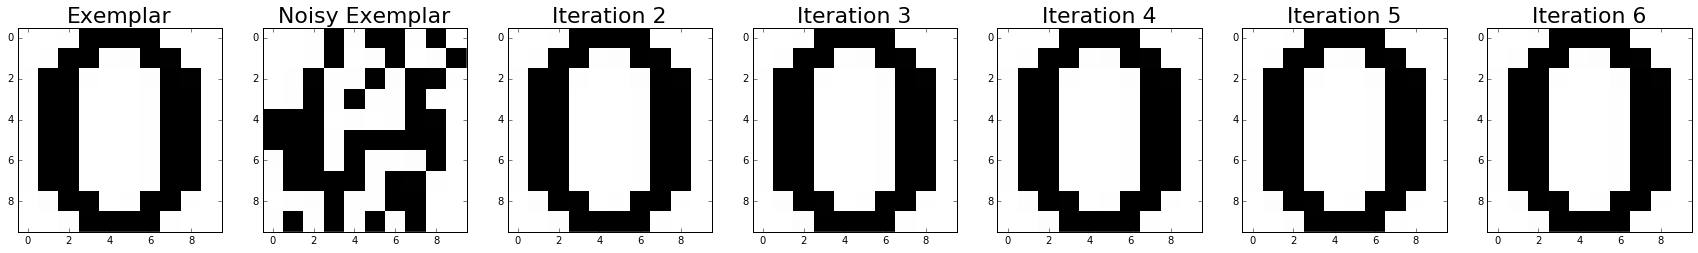

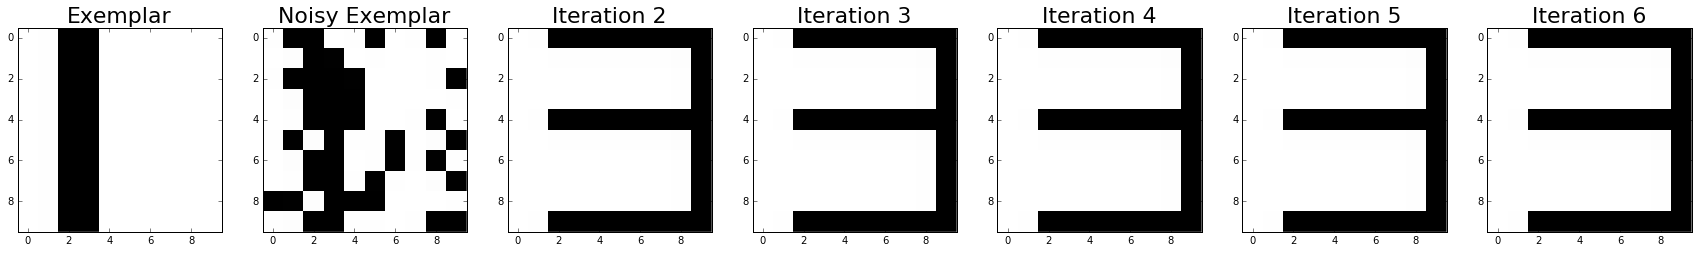

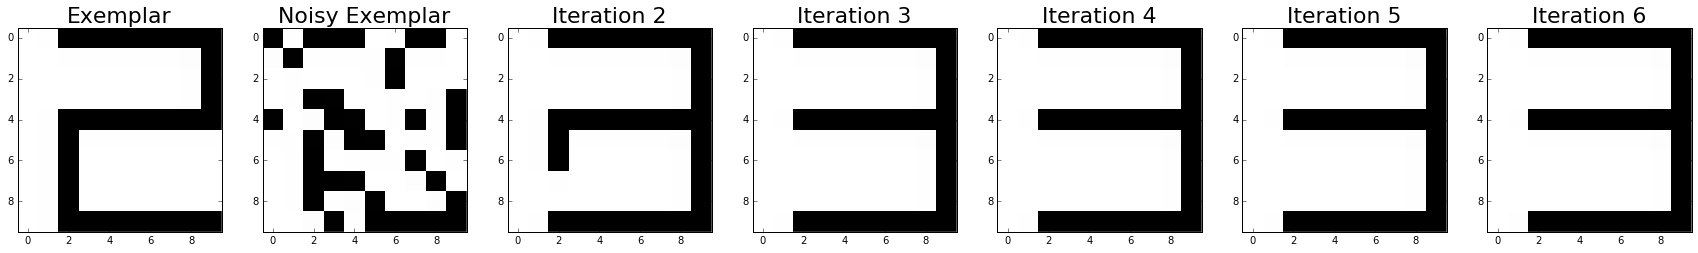

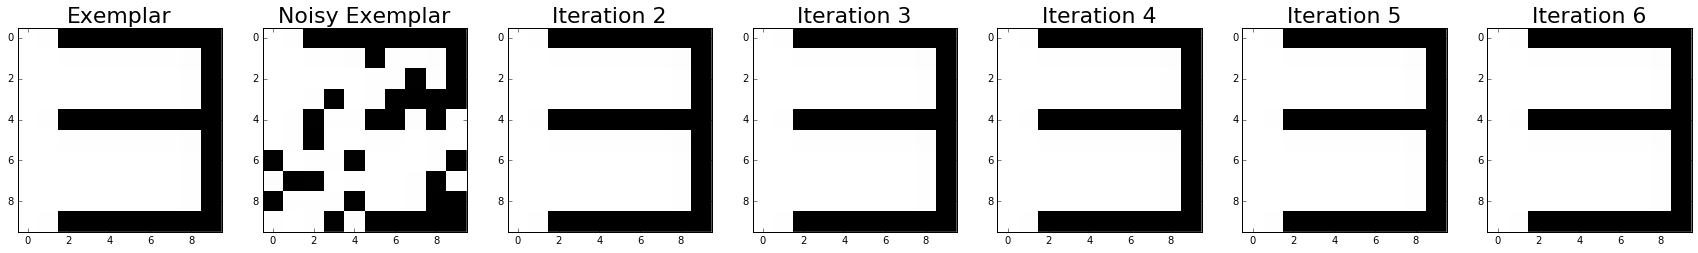

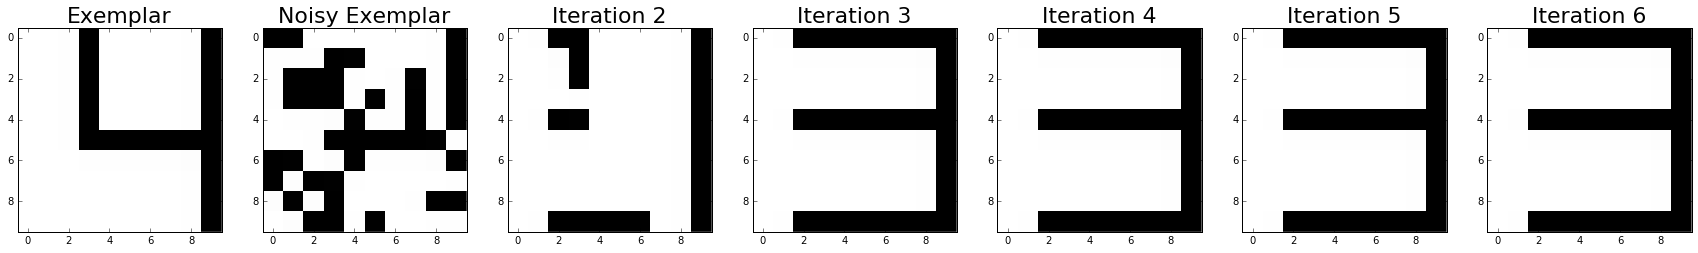

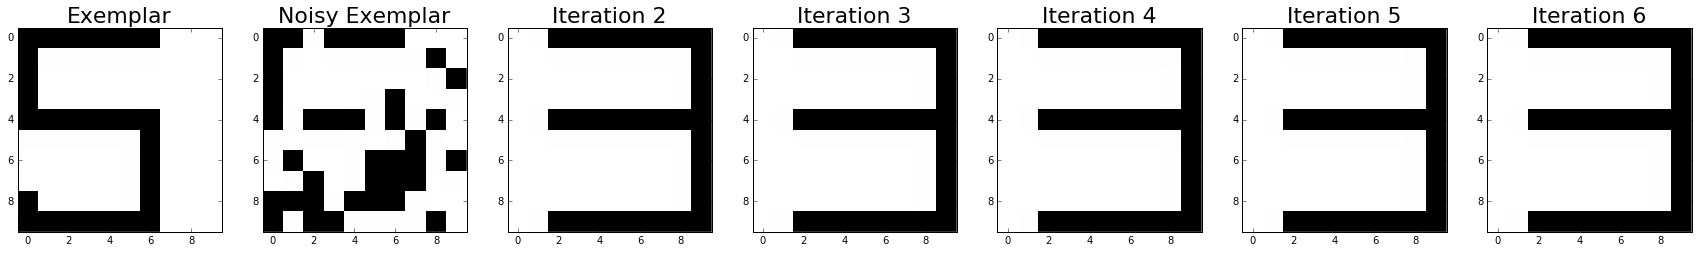

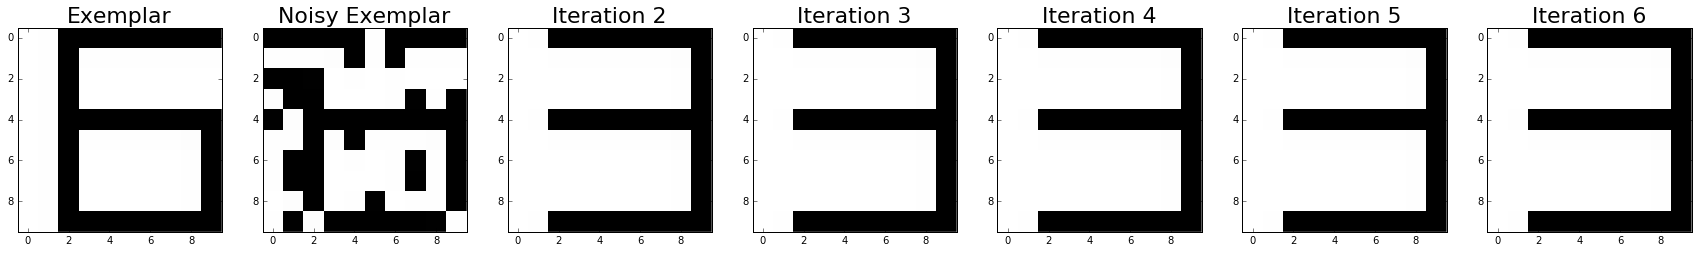

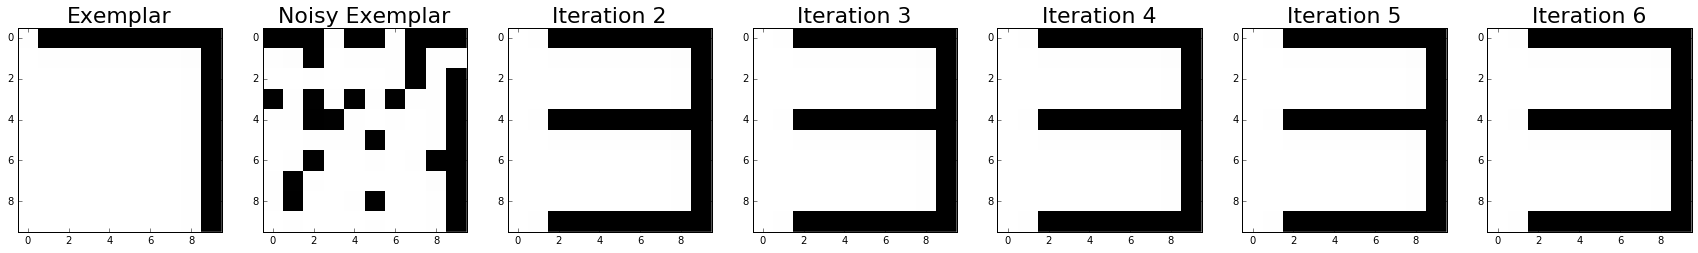

In [11]:
exemplars = Exemplars.get_exemplars()[0:8]

n = 7
for exemplar in exemplars:
    figure, axes = plt.subplots(1, n, figsize=(30,30))
    
    # Original version
    axes[0].imshow(Exemplars.to_matrix(exemplar), cmap='Greys', interpolation='None')
    axes[0].set_title("Exemplar", fontdict={'fontsize':22})

    # Noisy version
    x_k = Exemplars.add_noise(exemplar)
    axes[1].imshow(Exemplars.to_matrix(x_k), cmap='Greys', interpolation='None')
    axes[1].set_title("Noisy Exemplar", fontdict={'fontsize':22})
    
    # Retrieval
    for i in range(2, n):
        x_k = network.recall(x_k, asynchronous=True)
        axes[i].imshow(Exemplars.to_matrix(x_k), cmap='Greys', interpolation='None')
        axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

**Summary**

Try the Storkey rule here..

_Old content_

While the Hopfield Network may be a convenient, elegant method for information retrieval when confronted with noisy data, the actual effectiveness is restricted by the degree of similarity between the exemplars used to train the network to begin with.  While we successfully retrieved **0** and **3** using their noisy variants, subsequent experiments made it obvious that - with the exception of 0 - other exemplars (noisy or not) will result in **3** being returned by the network after several iterations. 

Hopfield had identified that an exemplar pattern will be _unstable_ if it shares many bits in common with another exemplar pattern.  We can see quite clearly that **2**, **3**, **4**, **5** and **6** all share several elements in common - spanning the top, middle and bottom rows, as well as the rightmost column.  Thus attempts to recover a **6** gravitate quickly towards **3** because of the strong similarity in the characters to begin with.

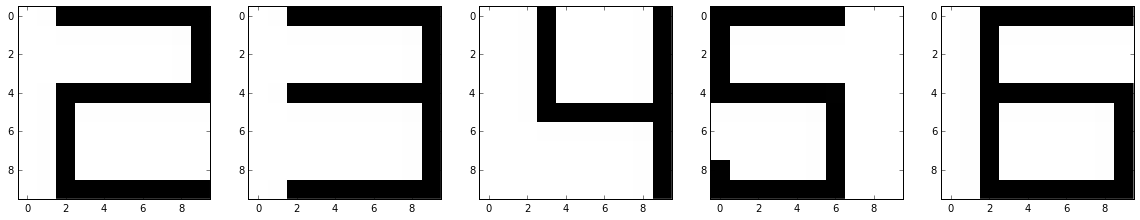

In [6]:
figure, axes = plt.subplots(1, 5, figsize=(20,20))
axes[0].imshow(Exemplars.to_matrix(exemplars[2]), cmap='Greys', interpolation='None')
axes[1].imshow(Exemplars.to_matrix(exemplars[3]), cmap='Greys', interpolation='None')
axes[2].imshow(Exemplars.to_matrix(exemplars[4]), cmap='Greys', interpolation='None')
axes[3].imshow(Exemplars.to_matrix(exemplars[5]), cmap='Greys', interpolation='None')
axes[4].imshow(Exemplars.to_matrix(exemplars[6]), cmap='Greys', interpolation='None')